In [13]:
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
data_files = {
    'NewReno': 'Q1/a3q1_NewReno.cwnd',
    'Vegas': 'Q1/a3q1_Vegas.cwnd',
    'Veno': 'Q1/a3q1_Veno.cwnd',
    'Westwood': 'Q1/a3q1_Westwood.cwnd',
}

In [15]:
dfs = {f: pd.read_csv(p, delim_whitespace=True, header=None, names=['Time', 'StartWnd', 'EndWnd']) for f,p in data_files.items()}

In [16]:
dfs['Vegas']

,Time,StartWnd,EndWnd
0,1.00619,0,536
1,1.01330,536,1072
2,1.02128,1072,1608
3,1.02925,1608,2144
4,1.03628,2144,2680
...,...,...,...
2832,24.96160,6879,6920
2833,24.96960,6920,6961
2834,24.97760,6961,7002
2835,24.98560,7002,7043


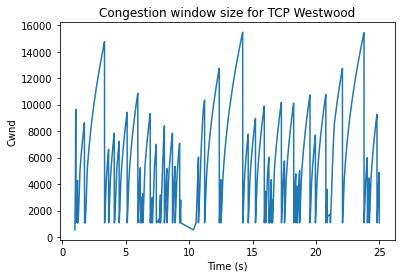

In [17]:
for title,df in dfs.items():
    plt.cla()
    plt.plot(df['Time'], df['EndWnd'])
    plt.title(f"Congestion window size for TCP {title}")
    plt.xlabel("Time (s)")
    plt.ylabel("Cwnd")
    plt.savefig(f"Q1/cwnd_plot_{title}.pdf")

In [18]:
print(f"Max window size:")
for title,df in dfs.items():
    print(f"{title:10} {df['EndWnd'].max()}")

Max window size:
NewReno    15462
Vegas      11252
Veno       15462
Westwood   15471


# Q2

In [20]:
import os 
const_adr = {}
const_cdr = {}
for file in os.listdir('Q2'):
    if file.endswith('.cwnd'):
        ftypes = file.split('.')[0].split('_')
        if ftypes[2] == 'c4Mbps':
            const_cdr[ftypes[1][1:]] = f"Q2/{file}"
        else:
            const_adr[ftypes[2][1:]] = f"Q2/{file}"

const_adr_dfs = {f: pd.read_csv(p, delim_whitespace=True, header=None, names=['Time', 'StartWnd', 'EndWnd']) for f,p in const_adr.items()}
const_cdr_dfs = {f: pd.read_csv(p, delim_whitespace=True, header=None, names=['Time', 'StartWnd', 'EndWnd']) for f,p in const_cdr.items()}


ADR=5, CDR=5Mbps: 7494.196633565744
ADR=5, CDR=10Mbps: 7082.952052414752
ADR=5, CDR=3Mbps: 7522.60041917259
ADR=5, CDR=15Mbps: 7194.352369668247
ADR=5, CDR=30Mbps: 6856.281433000345
CDR=4, ADR=2Mbps: 6551.545187920921
CDR=4, ADR=4Mbps: 7390.745061283345
CDR=4, ADR=1Mbps: 7186.981426762347
CDR=4, ADR=12Mbps: 6926.524288713531
CDR=4, ADR=8Mbps: 8356.3683458378


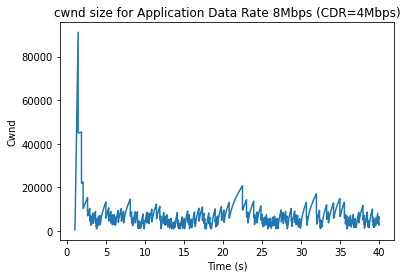

In [23]:
for title,df in const_adr_dfs.items():
    plt.cla()
    plt.plot(df['Time'], df['EndWnd'])
    print(f"ADR=5, CDR={title}: {df['EndWnd'][30:].mean()}")
    plt.title(f"cwnd size for Channel Data Rate {title} (ADR=5Mbps)")
    plt.xlabel("Time (s)")
    plt.ylabel("Cwnd")
    plt.savefig(f"Q2/const_adr_{title}.pdf")
    
for title,df in const_cdr_dfs.items():
    plt.cla()
    plt.plot(df['Time'], df['EndWnd'])
    print(f"CDR=4, ADR={title}: {df['EndWnd'][30:].mean()}")
    plt.title(f"cwnd size for Application Data Rate {title} (CDR=4Mbps)")
    plt.xlabel("Time (s)")
    plt.ylabel("Cwnd")
    plt.savefig(f"Q2/const_cdr_{title}.pdf")

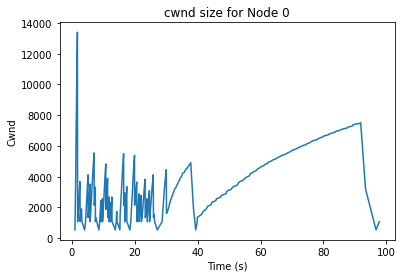

In [9]:
df = pd.read_csv('Q3/a3q3.cwnd', delim_whitespace=True, header=None, names=['Time', 'StartWnd', 'EndWnd'])
plt.cla()
plt.plot(df['Time'], df['EndWnd'])
plt.title(f"cwnd size for Node 0")
plt.xlabel("Time (s)")
plt.ylabel("Cwnd")
plt.savefig(f"Q3/tcp_cwnd.pdf")
